In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,precision_recall_fscore_support
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda, MaxPooling2D, Conv2D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import cv2
import PIL.Image as Image
import os
import random
import glob
from scipy.spatial import distance
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

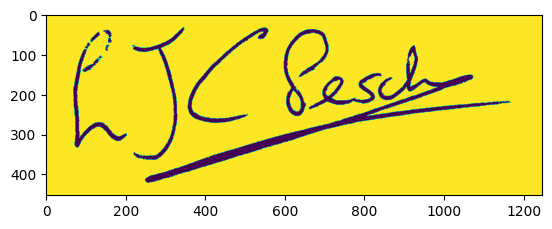

In [206]:
dataset_path = '/content/drive/MyDrive/ML-Datasets-colab/Dataset_sign'
img = plt.imread('/content/drive/MyDrive/ML-Datasets-colab/sample_Signature/forged/NFI-00301001.png')
plt.imshow(img)

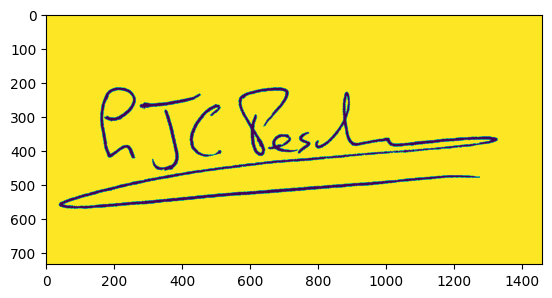

In [207]:
img1 = plt.imread('/content/drive/MyDrive/ML-Datasets-colab/sample_Signature/genuine/NFI-00101001.png')
plt.imshow(img1)

In [208]:
IMAGE_SHAPE = (224,224)
real_signs = [
       glob.glob('/content/drive/MyDrive/ML-Datasets-colab/Dataset_sign/dataset1/real/*.*'),
       glob.glob('/content/drive/MyDrive/ML-Datasets-colab/Dataset_sign/dataset2/real/*.*'),
       glob.glob('/content/drive/MyDrive/ML-Datasets-colab/Dataset_sign/dataset3/real/*.*'),
       glob.glob('/content/drive/MyDrive/ML-Datasets-colab/Dataset_sign/dataset4/real1/*.*')]

forged_signs = [
        glob.glob('/content/drive/MyDrive/ML-Datasets-colab/Dataset_sign/dataset1/forge/*.*'),
        glob.glob('/content/drive/MyDrive/ML-Datasets-colab/Dataset_sign/dataset2/forge/*.*'),
        glob.glob('/content/drive/MyDrive/ML-Datasets-colab/Dataset_sign/dataset3/forge/*.*'),
        glob.glob('/content/drive/MyDrive/ML-Datasets-colab/Dataset_sign/dataset4/forge/*.*')
]

In [209]:
training_data=[]
training_labels=[]
testing_data = []
train_paths=[]
testing_labels=[]
test_paths=[]
for data in range(len(real_signs)):
   for it in real_signs[data]:
    image = cv2.imread(it)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    resized_img = cv2.resize(image,IMAGE_SHAPE)
    if data==3:
      test_paths.append(it)
      testing_data.append(resized_img)
      testing_labels.append(0)  #0 stands for real signs
    else:
      train_paths.append(it)
      training_data.append(resized_img)
      training_labels.append(0)
for data in range(len(forged_signs)):
  for it in forged_signs[data]:
    image= cv2.imread(it)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    resized_img = cv2.resize(image,IMAGE_SHAPE)
    if data==3:
      testing_data.append(resized_img)
      test_paths.append(it)
      testing_labels.append(1)  #1 stands for forged signs
    else:
      training_data.append(resized_img)
      train_paths.append(it)
      training_labels.append(1)


In [210]:
test_paths[:4]

['/content/drive/MyDrive/ML-Datasets-colab/Dataset_sign/dataset4/real1/07703077.png',
 '/content/drive/MyDrive/ML-Datasets-colab/Dataset_sign/dataset4/real1/02403024.png',
 '/content/drive/MyDrive/ML-Datasets-colab/Dataset_sign/dataset4/real1/04605046.png',
 '/content/drive/MyDrive/ML-Datasets-colab/Dataset_sign/dataset4/real1/03304033.png']

In [211]:
training_data = np.array(training_data)
testing_data = np.array(testing_data)
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)


In [212]:
training_data = training_data/255.0
testing_data = testing_data/255.0
num_train = sum([len(x) for x in training_data])
num_test = sum([len(x) for x in testing_data])
print(f"Training data length: {num_train}")
print(f"Testing data length: {num_test}")

Training data length: 120960
Testing data length: 40320


In [213]:
def load_images(file_list):
    images = []
    for files in file_list:
        for file in files:
            img = cv2.imread(file)
            images.append(img)
    return images

In [214]:
gen_imgs = load_images(real_signs)
forg_imgs = load_images(forged_signs)

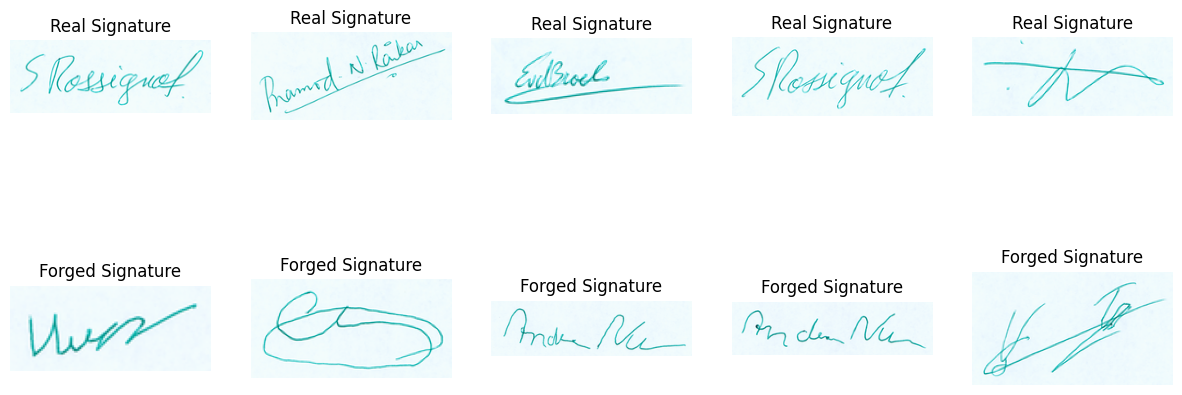

In [215]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i in range(5):
    axs[0, i].imshow(cv2.cvtColor(gen_imgs[i], cv2.COLOR_BGR2RGB))
    axs[0, i].set_title("Real Signature")
    axs[0, i].axis("off")

    axs[1, i].imshow(cv2.cvtColor(forg_imgs[i], cv2.COLOR_BGR2RGB))
    axs[1, i].set_title("Forged Signature")
    axs[1, i].axis("off")

plt.show()

In [216]:
training_data.shape

(540, 224, 224, 3)

In [217]:
testing_data.shape

(180, 224, 224, 3)

In [218]:
from sklearn.utils import shuffle
training_labels = to_categorical(training_labels)
testing_labels = to_categorical(testing_labels)
training_data,training_labels,train_paths = shuffle(training_data,training_labels,train_paths)
testing_data,testing_labels,test_paths = shuffle(testing_data,testing_labels,test_paths)


In [219]:
model = Sequential()

model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))
#CNN Layer 1
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

#CNN Layer 2
model.add(Conv2D(64,(3,3),1,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))


#CNN Layer 3
model.add(Conv2D(128,(3,3),1,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

#CNN Layer 4
model.add(Conv2D(64,(3,3),1,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

#CNN Layer 5
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))



#Flattening the output of Conv
model.add(Flatten())

#Adding Hidden layers along with Dropout
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(32,activation='relu'))

model.add(Dropout(0.25))


#Output layer
model.add(Dense(2,activation='softmax'))


In [220]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [221]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 batch_normalization_42 (Ba  (None, 222, 222, 16)      64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 111, 111, 16)      0         
 ng2D)                                                           
                                                                 
 dropout_62 (Dropout)        (None, 111, 111, 16)      0         
                                                                 
 conv2d_43 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 batch_normalization_43 (Ba  (None, 109, 109, 32)     

In [222]:
filepath = '/content/model.sav'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = filepath,monitor='val_loss',verbose=1,save_best_only=True,mode='min')
callbacks = [checkpoint]


In [223]:
progress=model.fit(training_data,training_labels,batch_size=8,epochs=50,callbacks=[callbacks],validation_split=0.2)

Epoch 1/50
53/54 [============================>.] - ETA: 0s - loss: 0.8608 - accuracy: 0.5047
Epoch 1: val_loss improved from inf to 0.69584, saving model to /content/model.sav
54/54 [==============================] - 10s 97ms/step - loss: 0.8607 - accuracy: 0.5069 - val_loss: 0.6958 - val_accuracy: 0.4722
Epoch 2/50
52/54 [===========================>..] - ETA: 0s - loss: 0.7670 - accuracy: 0.5288
Epoch 2: val_loss did not improve from 0.69584
54/54 [==============================] - 1s 22ms/step - loss: 0.7606 - accuracy: 0.5301 - val_loss: 0.7007 - val_accuracy: 0.4722
Epoch 3/50
52/54 [===========================>..] - ETA: 0s - loss: 0.7613 - accuracy: 0.5096
Epoch 3: val_loss improved from 0.69584 to 0.69241, saving model to /content/model.sav
54/54 [==============================] - 5s 94ms/step - loss: 0.7565 - accuracy: 0.5139 - val_loss: 0.6924 - val_accuracy: 0.5278
Epoch 4/50
52/54 [===========================>..] - ETA: 0s - loss: 0.7225 - accuracy: 0.5240
Epoch 4: val_los

In [245]:
model.evaluate(testing_data,testing_labels)

6/6 [==============================] - 0s 19ms/step - loss: 0.9177 - accuracy: 0.7556


[0.9176786541938782, 0.7555555701255798]

In [246]:
pred = model.predict(testing_data)
print(pred[:20])

6/6 [==============================] - 0s 18ms/step
[[0.02466291 0.9753371 ]
 [0.98130655 0.0186934 ]
 [0.91882414 0.08117591]
 [0.8856853  0.11431471]
 [0.06382397 0.936176  ]
 [0.9114281  0.08857197]
 [0.12796213 0.87203795]
 [0.4384066  0.5615934 ]
 [0.00949308 0.9905069 ]
 [0.9839065  0.01609347]
 [0.31313133 0.6868687 ]
 [0.00312241 0.99687755]
 [0.27974418 0.72025585]
 [0.9264149  0.07358508]
 [0.00720605 0.9927939 ]
 [0.9936393  0.00636065]
 [0.02706674 0.97293323]
 [0.12057682 0.87942314]
 [0.09080797 0.90919197]
 [0.61952436 0.38047558]]


In [226]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
# Assuming testing_labels is one-hot encoded
encoder = LabelEncoder()
encoded_testing_labels = encoder.fit_transform(testing_labels.argmax(axis=1))

accuracy = accuracy_score(pred.argmax(axis=1), encoded_testing_labels)

In [227]:
print(accuracy)

0.7555555555555555


In [248]:
pred = np.argmax(pred, axis=1)
pred

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1])

In [249]:
test= np.argmax(testing_labels, axis=1)
print(test)

[1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0
 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0
 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0
 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1]


In [250]:
for i in range(len(test)):
  print('Person ',i,' \n Predicted: ',pred[i],' Actual: ',test[i],'path: ',test_paths[i].split('/')[-1])

Person  0  
 Predicted:  1  Actual:  1 path:  00304035.png
Person  1  
 Predicted:  0  Actual:  1 path:  01604033.png
Person  2  
 Predicted:  0  Actual:  0 path:  08902089.png
Person  3  
 Predicted:  0  Actual:  1 path:  03201085.png
Person  4  
 Predicted:  1  Actual:  0 path:  03302033.png
Person  5  
 Predicted:  0  Actual:  0 path:  09202092.png
Person  6  
 Predicted:  1  Actual:  1 path:  03201086.png
Person  7  
 Predicted:  1  Actual:  0 path:  08504085.png
Person  8  
 Predicted:  1  Actual:  1 path:  00302046.png
Person  9  
 Predicted:  0  Actual:  0 path:  02404024.png
Person  10  
 Predicted:  1  Actual:  0 path:  00801008.png
Person  11  
 Predicted:  1  Actual:  1 path:  00301046.png
Person  12  
 Predicted:  1  Actual:  1 path:  01605089.png
Person  13  
 Predicted:  0  Actual:  0 path:  09205092.png
Person  14  
 Predicted:  1  Actual:  0 path:  01603016.png
Person  15  
 Predicted:  0  Actual:  0 path:  04403044.png
Person  16  
 Predicted:  1  Actual:  1 path:  032

In [231]:
print(len(testing_labels))

180


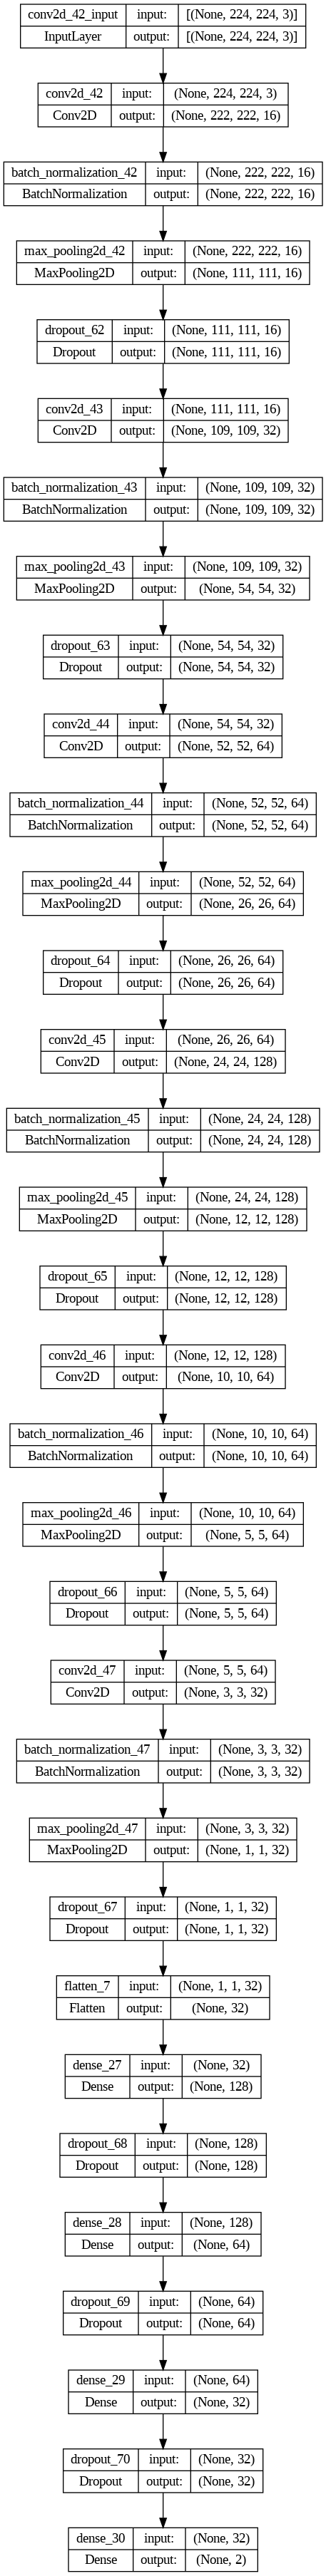

In [257]:
keras.utils.plot_model(model, "CNN_SIGN_Forgery_Detection.png", show_shapes=True)

In [232]:
model.evaluate(training_data,training_labels)

17/17 [==============================] - 0s 20ms/step - loss: 0.2378 - accuracy: 0.9111


[0.23784182965755463, 0.9111111164093018]

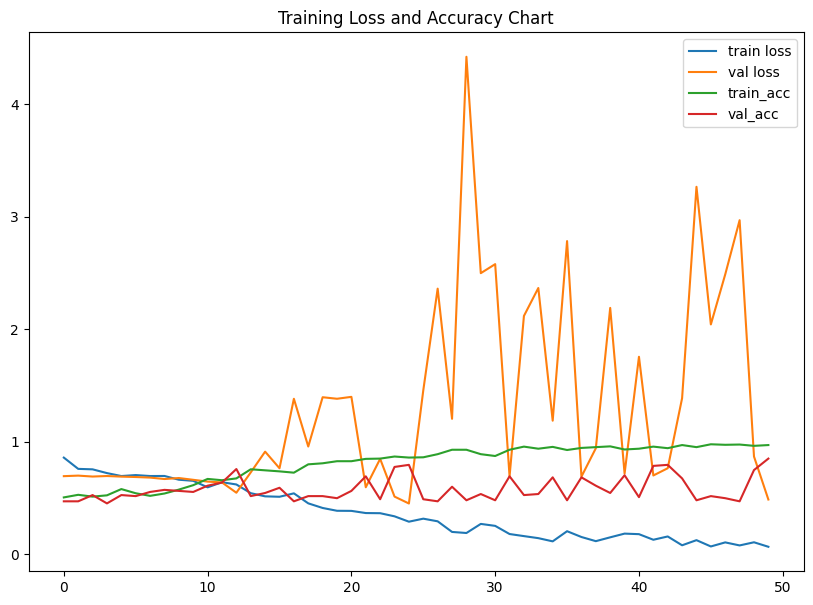

<Figure size 640x480 with 0 Axes>

In [233]:
plt.figure(figsize=(10,7))
plt.plot(progress.history['loss'], label='train loss')
plt.plot(progress.history['val_loss'], label='val loss')
plt.plot(progress.history['accuracy'], label='train_acc')
plt.plot(progress.history['val_accuracy'], label='val_acc')
plt.title("Training Loss and Accuracy Chart")
plt.legend()
plt.show()
plt.savefig('lossval_loss')

In [234]:
from tensorflow.keras.models import load_model
model.save('cnn_sign_model.h5')

In [235]:
cur_model = load_model('/content/cnn_sign_model.h5')
from tensorflow.keras.preprocessing import image

img = image.load_img('/content/drive/MyDrive/ML-Datasets-colab/Dataset_sign/dataset4/forge/00303002.png', target_size=(224,224))
x = image.img_to_array(img)
x


array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [236]:
x = x/255
from tensorflow.keras.applications.resnet50 import preprocess_input
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [237]:
cur_model.predict(img_data)

1/1 [==============================] - 0s 165ms/step


array([[1.2926267e-10, 1.0000000e+00]], dtype=float32)

In [238]:
a=np.argmax(cur_model.predict(img_data), axis=1)
if(a==1):
    print("The signature is fraud")
else:
    print("The signature is not fraud")

1/1 [==============================] - 0s 17ms/step
The signature is fraud


In [253]:
real_img =cv2.imread('/content/drive/MyDrive/ML-Datasets-colab/Dataset_sign/dataset4/real1/02404024.png')
real_img = cv2.cvtColor(real_img,cv2.COLOR_BGR2RGB)
real_img = cv2.resize(real_img,IMAGE_SHAPE)
real_img=real_img/255
real_img = real_img.reshape((1, 224, 224, 3))
predcur=cur_model.predict(real_img)

1/1 [==============================] - 0s 18ms/step


In [254]:
a=np.argmax(model.predict(real_img), axis=1)
if(a==1):
    print("The signature is fraud")
else:
    print("The signature is not fraud")

1/1 [==============================] - 0s 24ms/step
The signature is not fraud


6/6 [==============================] - 0s 16ms/step


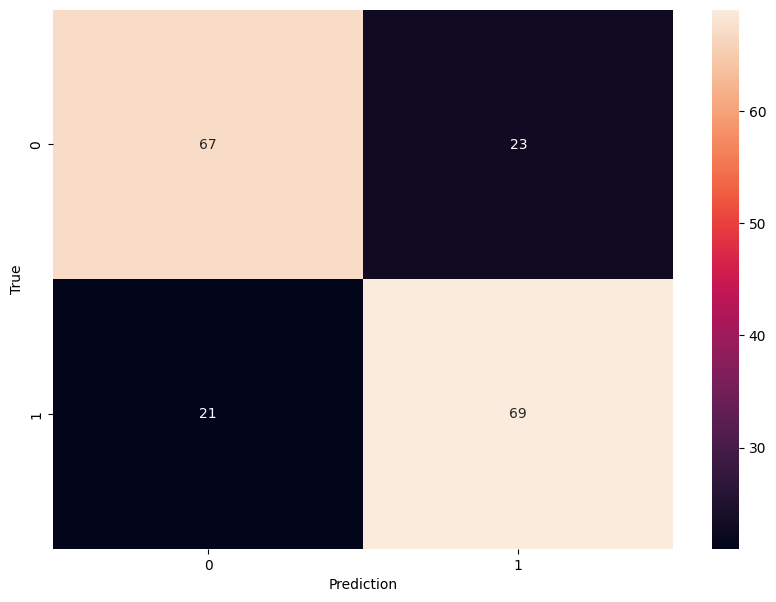

In [255]:
y_predictions =model.predict(testing_data)
y_predictions = [np.argmax(i) for i in y_predictions]
y_actual = [np.argmax(i) for i in testing_labels]
cm = confusion_matrix(y_actual,y_predictions)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show()

In [256]:
print(classification_report(y_actual,y_predictions))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        90
           1       0.75      0.77      0.76        90

    accuracy                           0.76       180
   macro avg       0.76      0.76      0.76       180
weighted avg       0.76      0.76      0.76       180



In [251]:
forge_img =cv2.imread('/content/drive/MyDrive/ML-Datasets-colab/Dataset_sign/dataset4/forge/00304035.png')
forge_img = cv2.cvtColor(forge_img,cv2.COLOR_BGR2RGB)
forge_img = cv2.resize(forge_img,IMAGE_SHAPE)
forge_img=forge_img/255
forge_img = forge_img.reshape((1, 224, 224, 3))
predcur=model.predict(forge_img)

1/1 [==============================] - 0s 32ms/step


In [252]:
a=np.argmax(model.predict(forge_img), axis=1)
if(a==1):
    print("The signature is fraud")
else:
    print("The signature is not fraud")

1/1 [==============================] - 0s 22ms/step
The signature is fraud
